# `titanic kaggle competition note book `

## author `Muhammad Khawar Haseem Satti`

### link [linkedin's](www.linkedin.com/in/khawar-haseem-087631290)


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [43]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [44]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
df_train.drop('Cabin', axis=1, inplace=True)

In [46]:
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
it = IterativeImputer()
it.fit(df_train[['Age']])
df_train['Age'] = it.transform(df_train[['Age']])

In [47]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [49]:
from sklearn.impute import SimpleImputer
simple = SimpleImputer(strategy='most_frequent')
df_train['Embarked'] = simple.fit_transform(df_train[['Embarked']]).squeeze()

In [50]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [51]:
# import label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_train.columns:
    if df_train[i].dtypes == 'object':
        df_train[i] = le.fit_transform(df_train[i])
    else:
        pass

In [52]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,2


In [53]:
# split the data into x and y
from sklearn.model_selection import train_test_split
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# split the data into train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# `Building Neural Network`


Epoch 1/100
23/23 [==============================] - 3s 31ms/step - loss: 9.6767 - accuracy: 0.5857 - val_loss: 4.2002 - val_accuracy: 0.5140
Epoch 2/100
23/23 [==============================] - 0s 10ms/step - loss: 3.4665 - accuracy: 0.5379 - val_loss: 2.8568 - val_accuracy: 0.6257
Epoch 3/100
23/23 [==============================] - 0s 10ms/step - loss: 2.1711 - accuracy: 0.5913 - val_loss: 1.3714 - val_accuracy: 0.6313
Epoch 4/100
23/23 [==============================] - 0s 13ms/step - loss: 1.3858 - accuracy: 0.6278 - val_loss: 1.2494 - val_accuracy: 0.6089
Epoch 5/100
23/23 [==============================] - 0s 12ms/step - loss: 1.2076 - accuracy: 0.6264 - val_loss: 1.3843 - val_accuracy: 0.5363
Epoch 6/100
23/23 [==============================] - 0s 12ms/step - loss: 1.2678 - accuracy: 0.6053 - val_loss: 1.0310 - val_accuracy: 0.6313
Epoch 7/100
23/23 [==============================] - 0s 11ms/step - loss: 1.0805 - accuracy: 0.6362 - val_loss: 1.3099 - val_accuracy: 0.5810
Epoch 

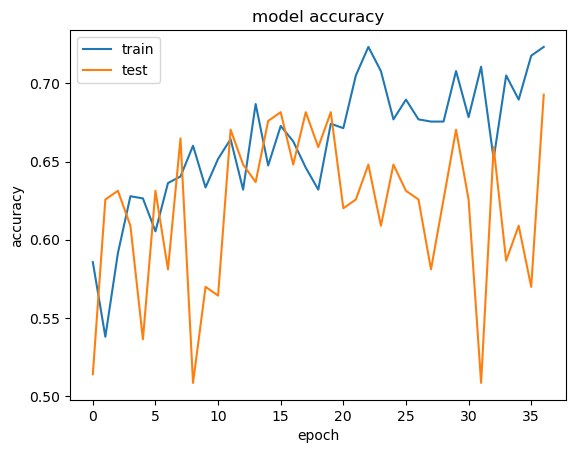

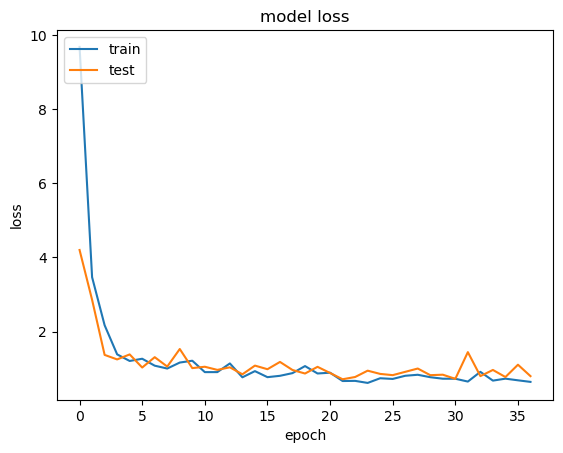

In [55]:
# create a model
import tensorflow as tf
# import callback function
from tensorflow.keras.callbacks import EarlyStopping
# creating  a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(
        X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# define the callback function
early_stop = EarlyStopping(monitor='val_loss', patience=15)
# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stop])
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'loss{loss},accuracy{accuracy}')

# plot the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# now for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# `now doing in machine learning with best model`


In [59]:

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [60]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.806136117403723
Test Accuracy: 0.7988826815642458

Model: Gradient Boosting
Cross-validation Accuracy: 0.8005417118093174
Test Accuracy: 0.8044692737430168

Model: XGBoost
Cross-validation Accuracy: 0.7893529006205062
Test Accuracy: 0.7821229050279329

Model: AdaBoost
Cross-validation Accuracy: 0.7977937555402345
Test Accuracy: 0.7877094972067039

Best Model: Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('model', GradientBoostingClassifier(random_state=42))])
